# conner

> 영화
- 예전; 24frame

# day1. 색/ 이미지
> 아날로그
- 센서에 의해 엄청난 연속된 데이터
- 샘플링을 통해 디지털화함.
- 자연: 아날로그값

> 샘플링
- 우리가 인지할 수 있는 값으로 샘플링
- 아날로그값: 실수 
- 시간차 오류 발생

> 양자화 
- 실수값을 우리가 인지할 수 있는 값으로 변환
- 정밀도 오류 발생


> RGB
- 빛의 3원색
> HVS
- 인간 시각의 인지를 통한 
>

# day2. 산술연산, LUT
- 산술연산
- 3D LUT


# day3. filter
- edge: 값이 값자기 변하는 부분(고주파)
- 저주파: 변화량이 적은 부분
- 의미 있는 부분만 잘 찾아내는 개념
- 특정 정보를 반영하도록

# day4. binary, mopology
- color영상-> gray -> binary: 단순화시켜서 분석해야 함.
- threshold -> adaptiveth reshold
- open, closed, 침식, 팽창

# day5. 기하학적 변형
- 회전, 이동, perspective, 
- 하나의 매트릭스를 통해 다양한 기하학적 변형에 이용
[sin cos dx]
[cos sin dy]
- CNN에서는  augmentation할 때 사용
- 거꾸로 매핑, reversed mapping에서 interporation.

# day6. conner

> QR code
- edge를 찾는 것이 아니라, conner를 찾아서 인식
- 노이즈가 있어도 잘 찾음


> 체크 패턴
- 스테레오 카메라 위치 선정할 때
- corner를 인식하는 정도를 가지고 기기 위치 수정


> 파노라마
- 코너점을 찾아서 공통된 코너점을 찾아서 뒤튼 것.


In [13]:
! pip install pyzbar

In [12]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
import qrcode  # grcode 설치 코드
import imutils  # qrcode generator
import random
from pyzbar.pyzbar import decode
from bokeh.lotting import figure
from bokeh.io import output_notebook, show, push_notebook  # 동영상

OSError: [WinError 126] 지정된 모듈을 찾을 수 없습니다

In [68]:
def imshow(tit, image):
    plt.title(tit)
    if len(image.shape)==3:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(image, cmap = 'gray')
    plt.show()

# 1. corner점 찾기 : cv2.cornerHarris()

In [19]:
src = cv2.imread('./day6_rs/building.jpg', cv2.IMREAD_GRAYSCALE)
src.shape

(600, 868)

In [20]:

#  block 크기, 소벨크기,    k=0.04~0.06     R=Det() - kTr()

harris = cv2.cornerHarris(src= src,
                          blockSize= 3, # (3,3)주변의 몇 개의 픽셀을 보고  볼 것인가 -> corner인지 아닌지 판단하기 위해서
                         # 숫자가 클수록 corner점이 적어짐. 보토은 3을 사용
                          ksize=3, # 소벨 필터의 크기
                          # 코너는 고주파 성분(변화가 있는 부분) 중에서 찾는 것이 기본
                          # 변화를 찾기 위해서 내부적으로는 소벨 필터를 사용.보통 3 사용
                          # dege를 찾을 때 주변의 픽셀의 크기 
                          k=0.04   # 보통 0.04~0.06사용 , k = Det() - kTr()
                
                         ) 
harris.dtype

dtype('float32')

> harris값을 계산하다보면 모든 픽셀마다 4개의 값이 나옴
- 4개의 값을 기준으로 corner인지 아닌지 결정
- 2 by 2 행렬의 판별식 - k *대각행렬 => 
- Response = 0이면 corner가 아님.
- R값을 조절해서 corner의 양을 결정
- 행렬의 값이 실수값이기 때문에 haris값도 float32

## 1.1. harris 값의 범위: corner일 확률값임

In [23]:
np.max(harris), np.min(harris)

(0.010007294, -0.005183762)

(array([8.70000e+01, 4.70000e+02, 7.58900e+03, 5.10984e+05, 1.43100e+03,
        1.69000e+02, 5.10000e+01, 1.30000e+01, 4.00000e+00, 2.00000e+00]),
 array([-0.00518376, -0.00366466, -0.00214555, -0.00062645,  0.00089266,
         0.00241177,  0.00393087,  0.00544998,  0.00696908,  0.00848819,
         0.01000729], dtype=float32),
 <a list of 10 Patch objects>)

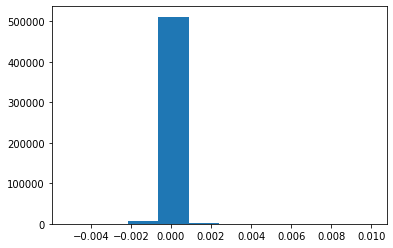

In [27]:
# 값의 분포 알아보기
plt.hist(harris.ravel())

- 대부분의 값이 -0.002~0.002 사이에 값이 몰려있음.

## 1.2. 정규화시켜서 눈으로 확인하기
- 최대, 최소값을 기준으로 원하는 값으로 변환

In [29]:
harris_norm = cv2.normalize(src =harris, 
                            dst =None,
                            alpha =0, 
                            beta =255,
                           norm_type =cv2.NORM_MINMAX,
                           dtype=cv2.CV_8U)

harris_norm.dtype


dtype('uint8')

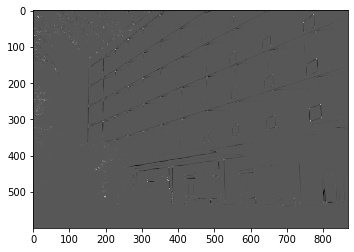

In [33]:
imshow('',harris_norm)

> 결과
>> 밝은 색으로 나오는 부분(흰색): 다른 점보다 hassis response값이 큰 점 
- -> corner일 확률이 높음.
    

#### corner의 개념
> 기계
- 모든 방향(수평, 수직, 대각선등)으로 변화가 생기는 부분을 코너로 인식


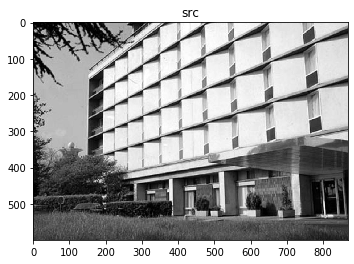

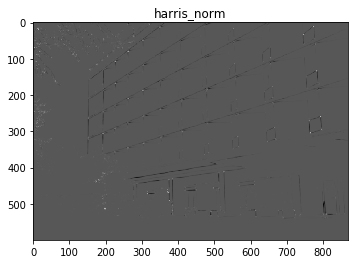

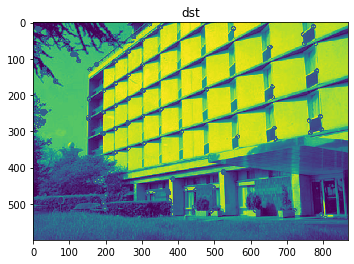

In [42]:
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 120:
                    cv2.circle(dst, (x, y), 5, (0, 0, 255), 2)

imshow('src', src)
imshow('harris_norm', harris_norm)
imshow('dst', dst)

## 1.3. 다른 이미지 연습

In [43]:
src = cv2.imread('./day6_rs/corner.png', cv2.IMREAD_GRAYSCALE)
src.shape

(490, 686)

In [51]:
#  block 크기, 소벨크기,    k=0.04~0.06     R=Det() - kTr()

harris = cv2.cornerHarris(src= src,
                          blockSize= 3,
                          ksize=3, 
                          k=0.04   
                         ) 
harris.dtype

dtype('float32')

In [53]:
# 정규화
harris_norm = cv2.normalize(src =harris, 
                            dst =None,
                            alpha =0, 
                            beta =255,
                           norm_type =cv2.NORM_MINMAX,
                           dtype=cv2.CV_8U)

harris_norm.dtype

dtype('uint8')

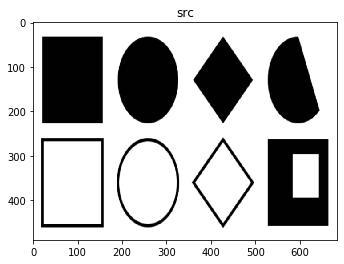

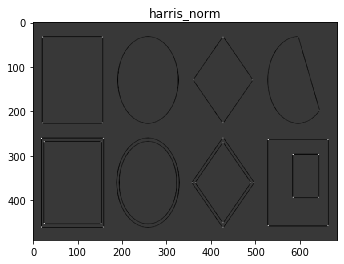

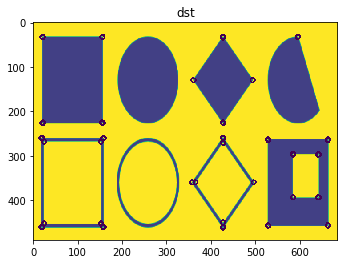

In [55]:
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 90:
                    cv2.circle(dst, (x, y), 5, (0, 0, 255), 2)

imshow('src', src)
imshow('harris_norm', harris_norm)
imshow('dst', dst)

## 1.4. 다른 이미지 연습

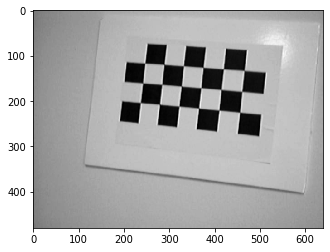

In [93]:
src = cv2.imread('./day6_rs/chessBoard.jpg', cv2.IMREAD_GRAYSCALE)
imshow('', src)

(array([2.39000e+02, 9.75000e+02, 1.01000e+03, 1.30700e+03, 3.02844e+05,
        3.55000e+02, 2.24000e+02, 1.71000e+02, 5.60000e+01, 1.90000e+01]),
 array([-0.00288656, -0.00228776, -0.00168897, -0.00109017, -0.00049138,
         0.00010741,  0.00070621,  0.001305  ,  0.0019038 ,  0.00250259,
         0.00310139], dtype=float32),
 <a list of 10 Patch objects>)

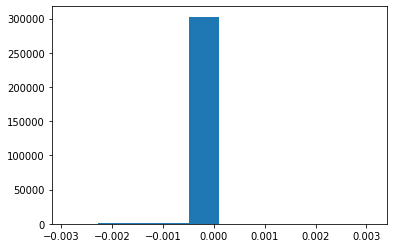

In [94]:
#  block 크기, 소벨크기,    k=0.04~0.06     R=Det() - kTr()

harris = cv2.cornerHarris(src= src,
                          blockSize= 3,
                          ksize=3, 
                          k=0.04   
                         ) 
plt.hist(harris.flatten())

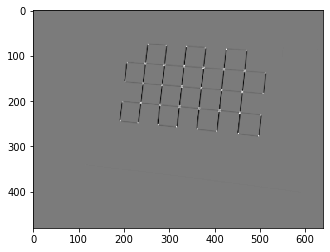

In [95]:
# 정규화
harris_norm = cv2.normalize(src =harris, 
                            dst =None,
                            alpha =0, 
                            beta =255,
                           norm_type =cv2.NORM_MINMAX,
                           dtype=cv2.CV_8U)

imshow('', harris_norm)

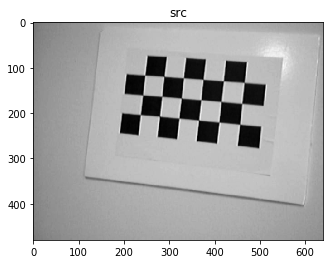

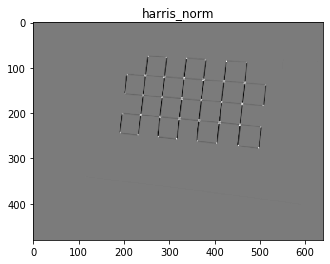

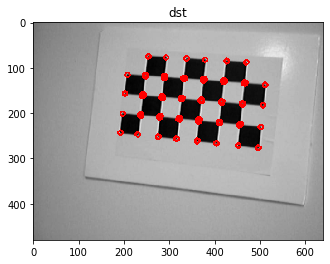

In [96]:
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 150:
                cv2.circle(dst, (x, y), 5, (0, 0, 255), 2)

imshow('src', src)
imshow('harris_norm', harris_norm)
imshow('dst', dst)

## 1.5. 블러링 후 corner찾기

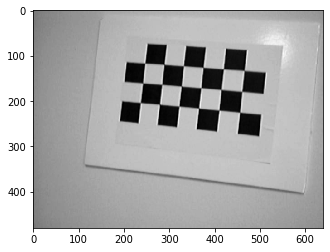

In [97]:
src = cv2.imread('./day6_rs/chessBoard.jpg', cv2.IMREAD_GRAYSCALE)
imshow('', src)

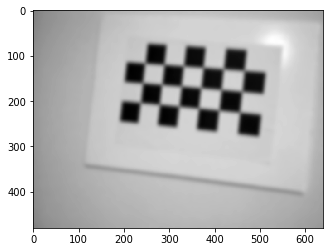

In [113]:
src_blur = cv2.GaussianBlur(src, (25,25),0  )
imshow('', src_blur)

(array([   473.,   1035.,    949.,   1723.,   2435.,   2358.,   2704.,
          3565.,   6011., 285947.]),
 array([-1.4274731e-05, -1.2755081e-05, -1.1235431e-05, -9.7157808e-06,
        -8.1961307e-06, -6.6764810e-06, -5.1568309e-06, -3.6371810e-06,
        -2.1175310e-06, -5.9788090e-07,  9.2176913e-07], dtype=float32),
 <a list of 10 Patch objects>)

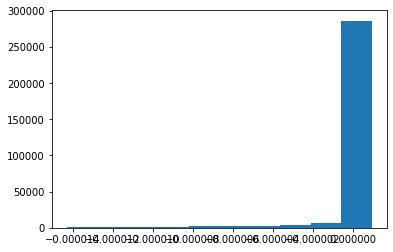

In [114]:
#  block 크기, 소벨크기,    k=0.04~0.06     R=Det() - kTr()
harris_blur = cv2.cornerHarris(src= src_blur,
                          blockSize= 3,
                          ksize=3, 
                          k=0.04   
                         ) 

plt.hist(harris_blur.flatten())

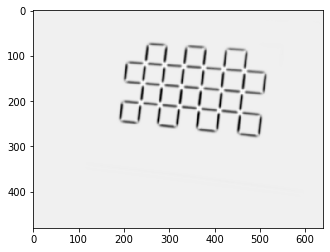

In [115]:
# 정규화
harris_norm_blur = cv2.normalize(src =harris_blur, 
                            dst =None,
                            alpha =0, 
                            beta =255,
                           norm_type =cv2.NORM_MINMAX,
                           dtype=cv2.CV_8U)

imshow('', harris_norm_blur)

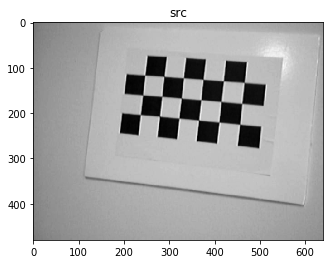

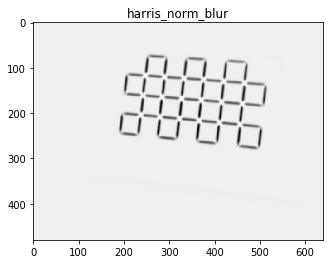

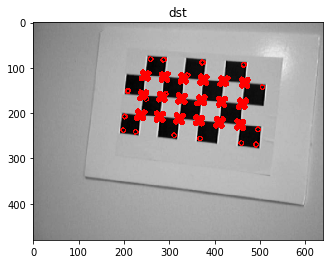

In [116]:
dst2 = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for y in range(harris_norm_blur.shape[0]):
        for x in range(harris_norm_blur.shape[1]):
            if harris_norm_blur[y, x] > 240: # 배경값이 커지므로 threshole값이 커짐
                cv2.circle(dst2, (x, y), 5, (0, 0, 255), 2)

imshow('src', src)

imshow('harris_norm_blur', harris_norm_blur)
imshow('dst', dst2)

## 1.6. 블러링 후 corner찾기2

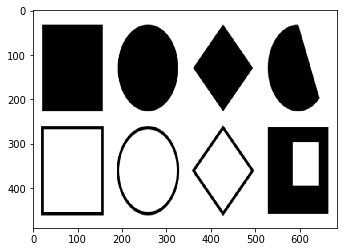

In [117]:
src = cv2.imread('./day6_rs/corner.png', cv2.IMREAD_GRAYSCALE)
imshow('', src)

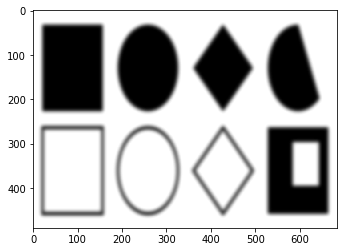

In [118]:
src_blur = cv2.GaussianBlur(src, (25,25),0  )
imshow('', src_blur)

(array([  4983.,   3058.,   2682.,   2248.,   3746.,   3927.,   7958.,
         10946.,  20176., 276416.]),
 array([-5.2855644e-06, -4.7150088e-06, -4.1444528e-06, -3.5738972e-06,
        -3.0033416e-06, -2.4327858e-06, -1.8622301e-06, -1.2916744e-06,
        -7.2111862e-07, -1.5056290e-07,  4.1999283e-07], dtype=float32),
 <a list of 10 Patch objects>)

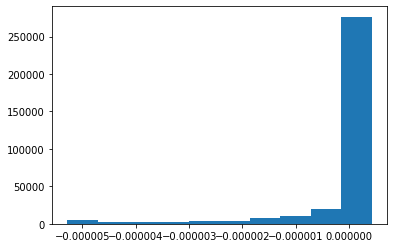

In [119]:
#  block 크기, 소벨크기,    k=0.04~0.06     R=Det() - kTr()
harris_blur = cv2.cornerHarris(src= src_blur,
                          blockSize= 3,
                          ksize=3, 
                          k=0.04   
                         ) 

plt.hist(harris_blur.flatten())

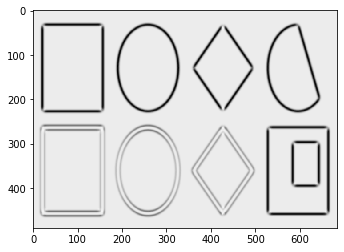

In [120]:
# 정규화
harris_norm_blur = cv2.normalize(src =harris_blur, 
                            dst =None,
                            alpha =0, 
                            beta =255,
                           norm_type =cv2.NORM_MINMAX,
                           dtype=cv2.CV_8U)

imshow('', harris_norm_blur)

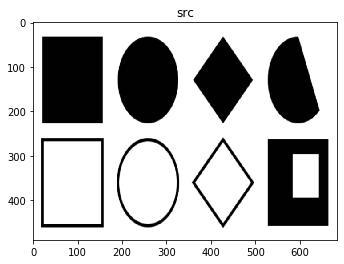

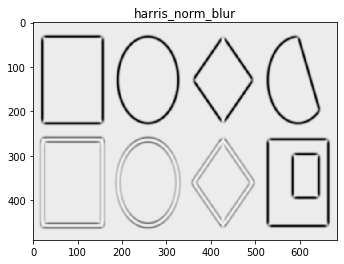

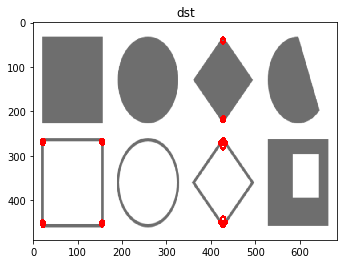

In [121]:
dst2 = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for y in range(harris_norm_blur.shape[0]):
        for x in range(harris_norm_blur.shape[1]):
            if harris_norm_blur[y, x] > 240: # 배경값이 커지므로 threshole값이 커짐
                cv2.circle(dst2, (x, y), 5, (0, 0, 255), 2)

imshow('src', src)

imshow('harris_norm_blur', harris_norm_blur)
imshow('dst', dst2)

## 1.7. 블러링 후 corner찾기3

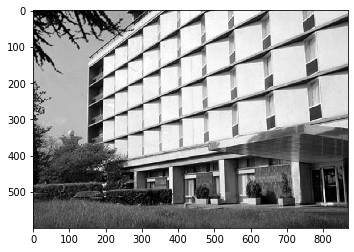

In [123]:
src = cv2.imread('./day6_rs/building.jpg', cv2.IMREAD_GRAYSCALE)
imshow('', src)

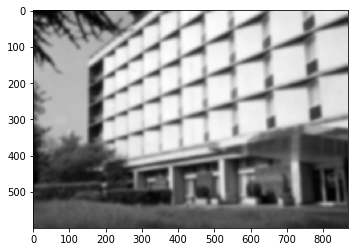

In [124]:
src_blur = cv2.GaussianBlur(src, (25,25),0  )
imshow('', src_blur)

(array([4.30000e+01, 8.60000e+01, 1.10000e+02, 3.13000e+02, 1.18700e+03,
        2.99100e+03, 8.11500e+03, 1.64010e+04, 6.77920e+04, 4.23762e+05]),
 array([-2.7738673e-05, -2.4697143e-05, -2.1655615e-05, -1.8614084e-05,
        -1.5572554e-05, -1.2531024e-05, -9.4894949e-06, -6.4479650e-06,
        -3.4064351e-06, -3.6490530e-07,  2.6766245e-06], dtype=float32),
 <a list of 10 Patch objects>)

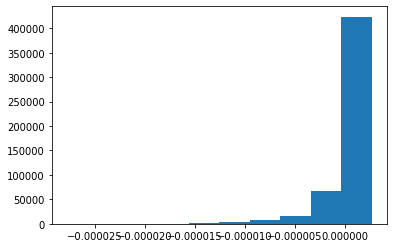

In [125]:
#  block 크기, 소벨크기,    k=0.04~0.06     R=Det() - kTr()
harris_blur = cv2.cornerHarris(src= src_blur,
                          blockSize= 3,
                          ksize=3, 
                          k=0.04   
                         ) 

plt.hist(harris_blur.flatten())

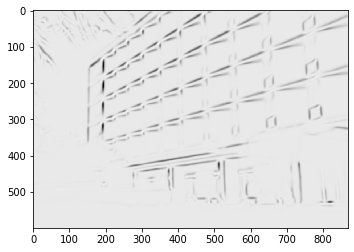

In [126]:
# 정규화
harris_norm_blur = cv2.normalize(src =harris_blur, 
                            dst =None,
                            alpha =0, 
                            beta =255,
                           norm_type =cv2.NORM_MINMAX,
                           dtype=cv2.CV_8U)

imshow('', harris_norm_blur)

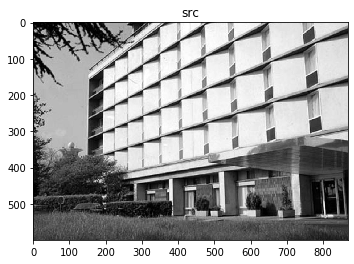

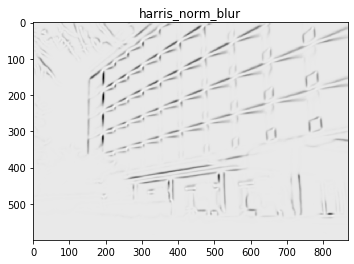

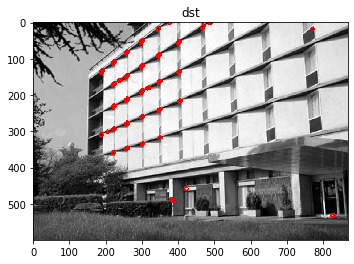

In [127]:
dst2 = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for y in range(harris_norm_blur.shape[0]):
        for x in range(harris_norm_blur.shape[1]):
            if harris_norm_blur[y, x] > 240: # 배경값이 커지므로 threshole값이 커짐
                cv2.circle(dst2, (x, y), 5, (0, 0, 255), 2)

imshow('src', src)

imshow('harris_norm_blur', harris_norm_blur)
imshow('dst', dst2)

## 1.8 for문 없이 corner점 표현하기

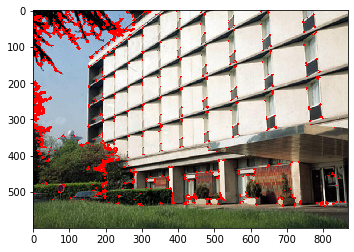

In [155]:
img = cv2.imread('./day6_rs/building.jpg', 1)

gray = cv2.imread('./day6_rs/building.jpg', cv2.IMREAD_GRAYSCALE)

dst = cv2.cornerHarris(gray, 5,3,0.04)

# 보통 normalize하기 전 harris값에 그대로 적용
# 최대값의 1%보다 크면 corner로 보기 (상대적인 값으로 취값)
img[dst > dst.max() * 0.01] = [0,0,255]
imshow('', img)

In [131]:
a = np.array([[1,2,4],
              [7,0,1]])

In [133]:
a[a > 3]

array([4, 7])

## 1.9. Harrisconner의 문제점

> 코너점 찾기 , 대응점 찾기가 중요 
- 시간차를 둔 두개의 영상을 비교할때 사용
- 파노라마 등

> 3가지 단계로 해결
- 검출: harrisconner 등
- 기술: 회전 등을 했을 대 같은 코너점인지를 어떻게 표현할지
- 매칭: 같은 점인지를 어떻게 매칭할 것인가


### 1.9.1. 무엇이 특징점인가
> edge
- 에지강도와 방향정보만 가지므로 매칭하기에는 정보가 부족
- x축 미분; x축끼리 빼는것.
- y축 미분; y축끼리 빼는 것 -> 방향정보를 알 수 있음.


> 다른 곳과 두드러지게 달라 풍부한 정보추출한 곳을 찾아서 특징점으로 쓰자
- 에지 토막에서 곡률이 큰 지점을 코너로 검출
- 지금은 사용 안함

> 지역 특징점
- 지역 정보를 갖고있는 코너점 사용


> 좋은 특징점
- 무조건 저주파 성분은 무시(변화가 작은 점)
- 모든 방향에서 밝기 변화가 뚜렷한 곳.

### 1.9.2 모라벡 알고리즘
> 모라벡 알고리즘
- 한 픽셀에서 모든 방향에서 자기 자신을 뺐을 대(8개의 방향과 차이 보기)
- 밝기 변화가 있는 방향의 수를 count세기
- 값이 클수록 모든 방향으로 edge가 있음.
- 값이 작을 수록 특정 방향으로만 엣지가 있음.
- 노이즈에 민감

### 1.9.3  harris corner
- 모라벡 알고리즘을 개선한 것
- 2차 모멘트 행렬
- [y축 2차 미분, x,y축 미분]
- [x,y축 미분, x축 2차 미분]
- 2차 모멘트 행렬의 고유값 분석
- C값을 가지고 변화가 있는지 없는지 알수있음.

> 헤리스 코너의 문제점
- 코너점이 중첩해서 굉장히 많이 생김.
- 큰 값이 밀집되어 나타남 -> 대표점 선택 필요
- 주변값과 비교해서 가장 큰 점이 선택됨.(절대적 x, 상대적인 비교)
- 미분이용 -> 속도가 너무 올래 걸리고 복잡함


### 1.9.4 feature detector
- harris conner보다 성능을 떨어지지만
- 속도를 개선 -> 실시간 처리에 가능(harris conner보다 2~30배 빠름)

# 2. featureDetector

- herris conner보다 성능을 떨어지지만 훨씬 빨라서 많이 사용됨

## 2.1. building 연습

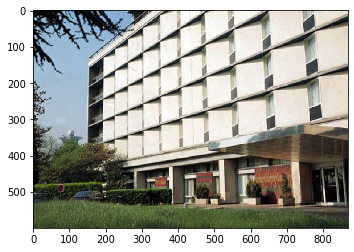

In [170]:
src = cv2.imread('./day6_rs/building.jpg', 1)
gray = cv2.imread('./day6_rs/building.jpg', cv2.IMREAD_GRAYSCALE)

imshow('', src)

In [174]:
fast = cv2.FastFeatureDetector_create(threshold=50)
 # 작아지면 코너 많이 검출딤, 원에서도 검출되지만 중첨되서 검출될수 있음.

In [175]:
# 특징점의 봅기
keypoints = fast.detect(src)
len(keypoints)

848

In [176]:
x, y = keypoints[0].pt
# x = keypoints[0].pt[0]
# y = keypoints[0].pt[1]

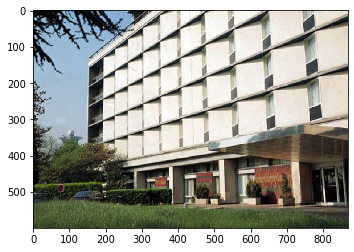

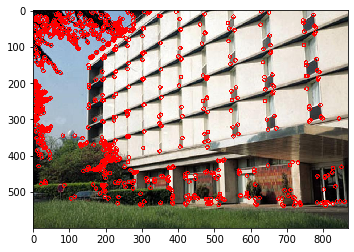

In [177]:
dst = src.copy()
for kp in keypoints:
    pt = (int(kp.pt[0]), int(kp.pt[1]))
    cv2.circle(dst, pt, 5, (0,0,255), 2)
    
imshow('', src)
imshow('', dst)

## 2.2. checkboard 연습

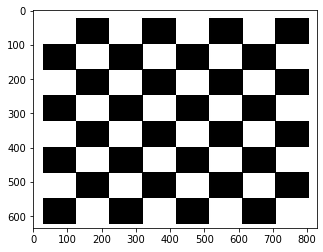

In [178]:
src = cv2.imread('./day6_rs/chessboardbasic.jpg', 1)
gray = cv2.imread('./day6_rs/chessboardbasic.jpg', cv2.IMREAD_GRAYSCALE)

imshow('', src)

In [179]:
fast = cv2.FastFeatureDetector_create(threshold=50)
 # 작아지면 코너 많이 검출딤, 원에서도 검출되지만 중첨되서 검출될수 있음.

In [180]:
# 특징점의 봅기
keypoints = fast.detect(src)
len(keypoints)

126

In [181]:
x, y = keypoints[0].pt
# x = keypoints[0].pt[0]
# y = keypoints[0].pt[1]

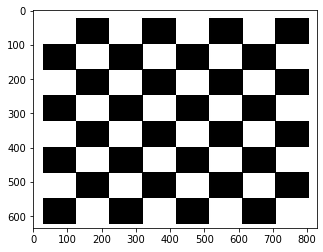

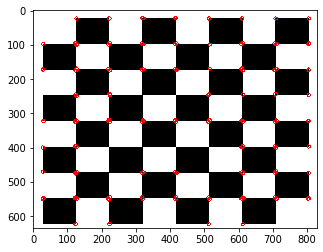

In [182]:
dst = src.copy()
for kp in keypoints:
    pt = (int(kp.pt[0]), int(kp.pt[1]))
    cv2.circle(dst, pt, 5, (0,0,255), 2)
    
imshow('', src)
imshow('', dst)

## 2.3. shape 연습

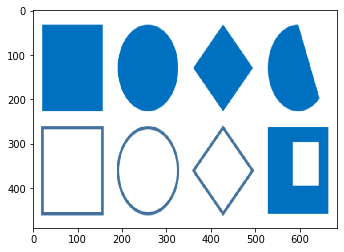

In [183]:
src = cv2.imread('./day6_rs/corner.png', 1)
gray = cv2.imread('./day6_rs/corner.png', cv2.IMREAD_GRAYSCALE)

imshow('', src)

In [184]:
fast = cv2.FastFeatureDetector_create(threshold=50)
 # 작아지면 코너 많이 검출딤, 원에서도 검출되지만 중첨되서 검출될수 있음.

In [185]:
# 특징점의 봅기
keypoints = fast.detect(src)
len(keypoints)

35

In [186]:
x, y = keypoints[0].pt
# x = keypoints[0].pt[0]
# y = keypoints[0].pt[1]

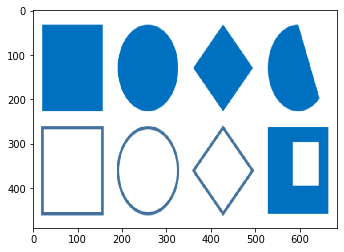

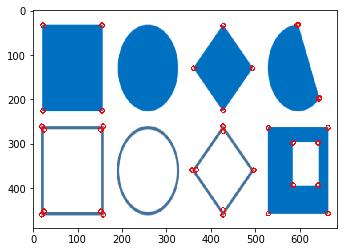

In [188]:
dst = src.copy()
for kp in keypoints:
    pt = (int(kp.pt[0]), int(kp.pt[1]))
    cv2.circle(dst, pt, 5, (0,0,255), 2)
    
imshow('', src)
imshow('', dst)

# 3. 40개의 corner를 찾는 방법

1. 거리가 가까운 점끼리 합치기
2. 코너점 그려서 팽창 -> 점끼리 뭉쳐지면 contour한 후, 중심점 찾기

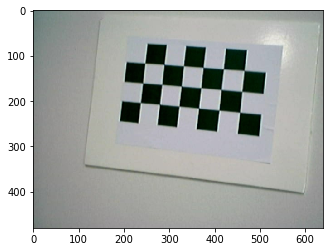

In [197]:
src = cv2.imread('./day6_rs/chessBoard.jpg', 1)
gray = cv2.imread('./day6_rs/chessBoard.jpg', cv2.IMREAD_GRAYSCALE)

imshow('', src)

## 3.1. 코너점 그려서 팽창 -> 점끼리 뭉쳐지면 contour한 후, 중심점 찾기

In [192]:
fast = cv2.FastFeatureDetector_create(threshold=50)
 # 작아지면 코너 많이 검출딤, 원에서도 검출되지만 중첨되서 검출될수 있음.

In [193]:
# 특징점의 봅기
keypoints = fast.detect(src)
len(keypoints)

92

In [194]:
x, y = keypoints[0].pt
# x = keypoints[0].pt[0]
# y = keypoints[0].pt[1]

### 3.1.1. 반지름 크게 해서 가까운 점끼리 합쳐지게 하기

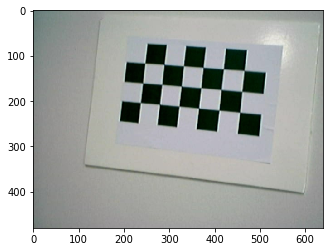

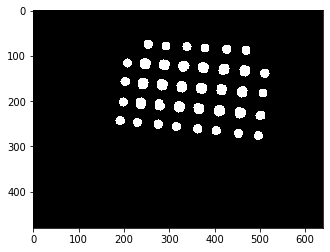

In [204]:
# 흰색으로 점만 그리기, 원 안을 채워서 그리기
mask = np.zeros(src.shape, dtype ='uint8')
mask.shape

for kp in keypoints:
    pt = (int(kp.pt[0]), int(kp.pt[1]))
    # 근처의 점들을 합치기 위해서 반지름을 크게 두기 (팽창 연산 써도 되고)
    cv2.circle(mask, pt, 10, (255,255,255), -1)
    
imshow('', src)
imshow('', mask)

### 3.1.2. contours 적용하기 

In [218]:
mask.shape

(480, 640, 3)

In [221]:
mask2 = cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)

In [222]:
contours, _ = cv2.findContours(mask2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
len(contours)

38

### 3.1.3. 중심점 찾기: cv2.moments()
> dictionary형태
- M00: 면적을 의미 = binary 영상에서는 점의 개수
- 면적이 100이라는 것은 점이 100개라는 뜻
- 면적의 평균 = 중심점이 나옴

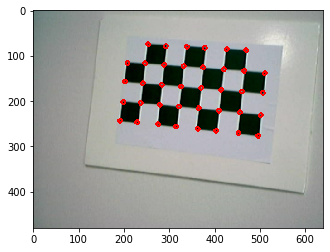

In [223]:
src = cv2.imread('./day6_rs/chessBoard.jpg', 1)

points = []

for con in contours:
    M = cv2.moments(con, 
                    True # 폐곡선 만들기
                   )
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    cv2.circle(src, (cx, cy), 4, (0,0,255), 3)
    points.append([cx, cy])
imshow('', src)


In [224]:
points

[[497, 276],
 [453, 271],
 [404, 265],
 [363, 261],
 [316, 256],
 [276, 251],
 [230, 247],
 [192, 243],
 [502, 231],
 [456, 225],
 [410, 221],
 [365, 216],
 [322, 212],
 [279, 208],
 [237, 204],
 [199, 202],
 [507, 182],
 [461, 179],
 [415, 175],
 [371, 171],
 [327, 168],
 [284, 164],
 [242, 161],
 [203, 157],
 [511, 139],
 [466, 133],
 [421, 130],
 [375, 126],
 [332, 123],
 [289, 120],
 [208, 116],
 [247, 117],
 [470, 88],
 [427, 86],
 [379, 83],
 [339, 80],
 [293, 79],
 [254, 75]]

### 3.1.3.contours를 순서대로 변경해서 바꾸기

#### y축 기준으로 정렬하기

#### 잘라져있는 상태에서 x축 기준으로 정렬하기